In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/erosion_project/milestone3_erosion_dataset.csv"
df = pd.read_csv(path)

df.head()

,DEM,NDVI,slope,erosion_label
0,576,0.247860,426.016202,1
1,415,0.226099,161.000000,1
2,61,0.236697,354.000000,1
3,399,0.242620,338.000000,1
4,248,0.249723,151.000000,1


In [ ]:
# Features (X)
X = df[['DEM', 'NDVI', 'slope']]

# Label (Y)
y = df['erosion_label']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (10000, 3)
y shape: (10000,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (8000, 3)
X_test : (2000, 3)
y_train: (8000,)
y_test : (2000,)


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print(df.columns)

Index(['DEM', 'NDVI', 'slope', 'erosion_label'], dtype='object')


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
print(df.columns)

Index(['dem', 'ndvi', 'slope', 'erosion_label'], dtype='object')


In [ ]:
X = df[['dem', 'ndvi', 'slope']]
y = df['erosion_label']

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 0.040548795744618095
R² Score: 0.9927139282226562


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import joblib

model_path = "/content/drive/MyDrive/erosion_project/xgboost_erosion_regression_model.pkl"
joblib.dump(model, model_path)

print("Model saved at:", model_path)

Model saved at: /content/drive/MyDrive/erosion_project/xgboost_erosion_regression_model.pkl


In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    "actual_erosion": y_test.values,
    "predicted_erosion": y_pred
})

csv_path = "/content/drive/MyDrive/erosion_project/xgboost_predictions.csv"
results_df.to_csv(csv_path, index=False)

print("Predictions CSV saved at:", csv_path)

Predictions CSV saved at: /content/drive/MyDrive/erosion_project/xgboost_predictions.csv


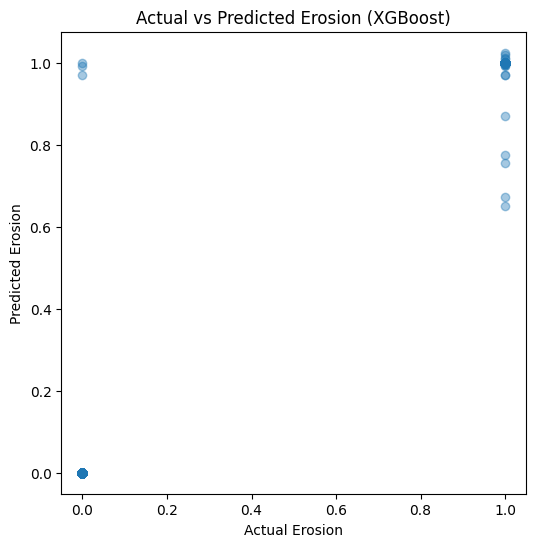

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Erosion")
plt.ylabel("Predicted Erosion")
plt.title("Actual vs Predicted Erosion (XGBoost)")
plt.show()

In [ ]:
plt.savefig("/content/drive/MyDrive/xgboost_actual_vs_predicted.png", dpi=300)

<Figure size 640x480 with 0 Axes>

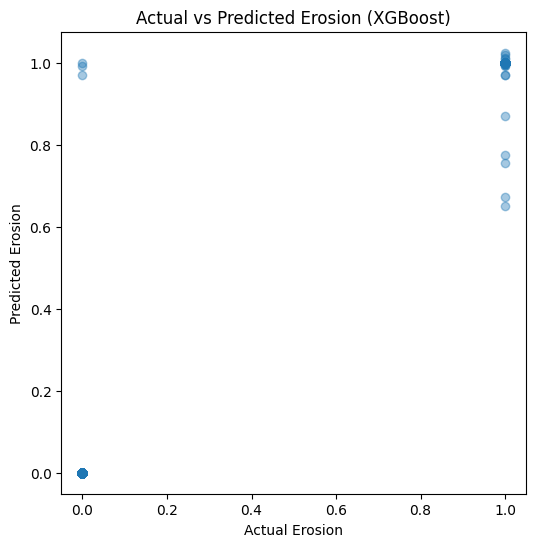

In [ ]:
import matplotlib.pyplot as plt

# Create figure and plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Erosion")
plt.ylabel("Predicted Erosion")
plt.title("Actual vs Predicted Erosion (XGBoost)")

# Save to Drive
plt.savefig("/content/drive/MyDrive/xgboost_actual_vs_predicted.png", dpi=300, bbox_inches='tight')

# Then show the figure
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/

'Colab Notebooks'   erosion_project   UNET_BACKUP_ONLY
 dataset_ruin3	    GEE_CSV	      unet_project


In [3]:
!ls /content/drive/MyDrive/erosion_project

milestone3_erosion_dataset.csv	 xgboost_erosion.ipynb
ndvi_dem_india_points.csv	 xgboost_erosion_regression_model.pkl
xgboost_actual_vs_predicted.png  xgboost_predictions.csv


In [4]:
from google.colab import files
files.download('/content/drive/MyDrive/erosion_project/milestone3_erosion_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>